## Linear methods for regression and classification
In this jupyter notebook, we will practice the topics covered in the lectures. Specially, we will do hands-on practice of:
- load and prepare data for machine learning model training and testing
- train and test linear models (linear regression (lasso/ridge), polynomial regression, and logistic regression)
- compare and understand model performance 

For implementations that have fixed results, we provide running examples for your reference. *You might get slightly different results due to the sklearn version you are using, just leave a comment to indicate your version where you get different results.*<br>

## Linear Regression and Polynomial Regression
In this section, we will explore the diabetes dataset:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>

This dataset contains n = 442 diabetes patients' information of ten variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. Each patient has a quantitative value of disease progression one year after baseline.


We will fit different regression models to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target variable <br>
    
2. Prepare data for model training and testing <br>

3. Fit different regression models (linear/lasso/ridge) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

**Note:** please always add comments to explain your observations/findings

In [6]:
#

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
from sklearn.datasets import load_diabetes

In [9]:
# there are different ways to load the dataset, please make sure you understand the mechanism
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
data = load_diabetes(as_frame=True)

### Basic dataset exploration 

In [10]:
data.data.shape, data.target.shape

((442, 10), (442,))

In [11]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [13]:
np.round(data.frame.describe(),3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


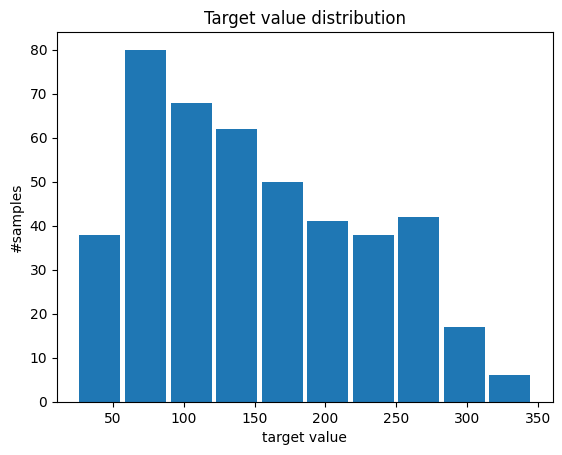

In [14]:
# plot a histogram to visualize the distribution of the "target" value
plt.hist(data.frame['target'], rwidth=0.9)
plt.title("Target value distribution")
plt.xlabel("target value")
plt.ylabel("#samples");

### Prepare data for model training and testing

In [15]:
# Split the data into 70% training and 30% testing
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Remember to set random_state to control for the randomness

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [16]:
# check feature matrix
X_train.shape, X_test.shape

((309, 10), (133, 10))

### Fit the linear regression model on the training set and evaluate model performance on the testing set 
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [17]:
reg = LinearRegression() # check the documentation to understand the default parameters
reg.fit(X_train, y_train)
reg_score = reg.score(X_test, y_test)
np.round(reg_score,3)

0.477

**Interpret model coefficients and intercept**

In [18]:
np.round(reg.coef_,3)

array([  29.254, -261.706,  546.3  ,  388.398, -901.96 ,  506.763,
        121.154,  288.035,  659.269,   41.377])

In [19]:
np.round(reg.intercept_,3)

151.008

**Your task**: write down the linear regression model with the above coefficients and intercept

#29.254 * age +  -261.706 * sex +  546.3 * bmi + 388.398 * bp + -901.96 * s1 + 506.763 * s2 + 121.154 * s3 
+ 288.035 * s4 +  659.269 * s5 + 41.377 * s6 + 151.008

**Your task**: explore other parameters/attributes/methods
- fit_intercept
- feature_names_in_, n_features_in_
Write your exploration code and results below

In [20]:
reg.fit_intercept

True

indicated that the model has intercept term

In [21]:
reg.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

This is an attribute. Include the feature names were used to train in the model

In [22]:
reg.n_features_in_

10

Number of features

### Fit and evaluate a Ridge regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [23]:
rg_reg = Ridge()
rg_reg.fit(X_train, y_train)
rg_reg_score = rg_reg.score(X_test, y_test)
np.round(rg_reg_score,3)

0.423

In [24]:
np.round(rg_reg.coef_,3)

array([  45.054,  -71.947,  280.716,  195.213,   -2.229,  -17.541,
       -148.689,  120.467,  198.614,  106.935])

In [25]:
np.round(rg_reg.intercept_,3)

151.867

### Your task: fit and evaluate a Lasso regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [26]:
# Fit model
lasso_reg = Lasso()

lasso_reg.fit(X_train, y_train)
lasso_reg_score = lasso_reg.score(X_test, y_test)
np.round(lasso_reg_score,3)


0.362

In [27]:
# Evaluate model performance

# The lasso regression model has a lower performance score than the linear regression model.
# 0.423 vs. 0.362


In [28]:
np.round(lasso_reg.coef_,3)

array([  0.   ,  -0.   , 443.703,  51.601,   0.   ,   0.   ,  -0.   ,
         0.   , 201.966,   0.   ])

In [29]:
# Interpret model coefficients and intercept


We can see that many coefficents were reduced to 0, formed a sparse model (many zeros)
Many features were penalized, thus also reduced the complexity of the model.

In [30]:
np.round(lasso_reg.intercept_,3)

# similar intercept

152.166

### Your task: compare the linear/ridge/lasso regression models
- write down your code to create and display the given dataframe

In [31]:
# hint: the following dataframe shows the expected way to organize and display the information
# make sure to: 
# - round to 3 digits after the decimal point
# - rename the column names 
# - include intercept and score in the last two rows


In [32]:
# Cannot load the table name from the lastest updated version of M2.2 file
# So I had to skip the table part of the question

**Your observations and thoughts of comparing the three models**
- hint: connect this with what we discussed in the lectures, e.g.
    - how does regularization affect coefficients and model performance 
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty) 

Lasso (L1 penalty) 
- Lasso regression has reduced several coefficients to zero, which is a hallmark of L1 regularization. This method is useful for feature selection as it tends to produce sparse models, effectively ignoring non-influential features.
- In this case, lasso has determined that 'age', 'sex', 's1', 's2', 's3', and 's6' do not contribute significantly to the model and has removed them by setting their coefficients to zero.

Ridge (L2 penalty)
- Ridge regression has not reduced any coefficients to zero but has shrunk them closer to zero compared to the linear regression model. This is typical of L2 regularization which penalizes the square of the coefficients and tends to distribute the coefficient values more evenly among the features.
- Here, 's1' and 's2' have small magnitude coefficients in ridge regression, suggesting they are less important than the other features but still contribute information to the model.

Overall Performance:
- The standard linear regression has the highest score, suggesting that without regularization, it fits the training data best among the three.
- Ridge regression has a slightly lower score than linear regression, indicating a small trade-off in performance due to regularization, which can benefit the model's performance on unseen data by reducing overfitting.
- Lasso regression has the lowest score, which could mean that while it provides a more interpretable model by selecting features, it may be too simplistic for the underlying complexity of the data, thus not capturing all the necessary relationships.

## Polynomial regression
- Use the diabetes data with the same train and test set to fit several **Polynomial regression** models 
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Fit a polynomail regression model with degree=2

In [33]:
# generate the new polynomial feature matrix for the training data 
# "fit_transform" on the original training data

poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_train_poly2.shape

(309, 66)

In [34]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly2 = poly2.transform(X_test)
X_test_poly2.shape

(133, 66)

In [35]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 

poly2_reg = LinearRegression()
poly2_reg.fit(X_train_poly2, y_train)
poly2_score = poly2_reg.score(X_test_poly2, y_test)
np.round(poly2_score,3)

0.413

### Your task: fit a polynomail regression model with degree=1
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=1** (name it as $poly1\_reg$)

In [36]:
# generate the new polynomial feature matrix for the training data 
# "fit_transform" on the original training data

poly1 = PolynomialFeatures(1)
X_train_poly1 = poly1.fit_transform(X_train)
X_train_poly1.shape

(309, 11)

In [37]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly1 = poly1.transform(X_test)
X_test_poly1.shape

(133, 11)

In [38]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 

poly1_reg = LinearRegression()
poly1_reg.fit(X_train_poly1, y_train)
poly1_score = poly1_reg.score(X_test_poly1, y_test)
np.round(poly1_score,3)

0.477

### Your task: fit a polynomail regression model with degree=3
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=3** (name it as $poly3\_reg$)

In [39]:
# generate the new polynomial feature matrix for the training data 
# "fit_transform" on the original training data

poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train)
X_train_poly3.shape

(309, 286)

In [40]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly3 = poly3.transform(X_test)
X_test_poly3.shape

(133, 286)

In [41]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 

poly3_reg = LinearRegression()
poly3_reg.fit(X_train_poly3, y_train)
poly3_score = poly3_reg.score(X_test_poly3, y_test)
np.round(poly3_score,3)

-92.443

### Your task: compare the polynomial regression models with degree=1/2/3 and the original linear regression model
- please write code to create and display the given data frame

In [42]:
data = {
    'Model': ['linear', 'poly1', 'poly2', 'poly3'],
    'Degree': [1, 1, 2, 3],
    'Score': [0.477, 0.477, 0.413, -92.443]
}

# Create the DataFrame
df_comparison = pd.DataFrame(data)

# Add a column with the rounded scores
df_comparison['Rounded_Score'] = np.round(df_comparison['Score'], 3)

# Display the DataFrame
print(df_comparison)

    Model  Degree   Score  Rounded_Score
0  linear       1   0.477          0.477
1   poly1       1   0.477          0.477
2   poly2       2   0.413          0.413
3   poly3       3 -92.443        -92.443


- Polynomial Regression (degree 1): 0.477
- Polynomial Regression (degree 2): 0.413
- Polynomial Regression (degree 3): -92.443


### Your task: observations and thoughts of comparing the above four models
- hint: connect this with overfitting/underfitting we discussed in class

The polynomial regression with degree 2 has a lower score than the degree 1 models, indicating that adding squared terms does not improve the model performance on the test dataset.

The degree 3 is too complex and overfitting, it has a significantly negative score, which is highly unusual and indicates that the model is performing extremely poorly. Suggesting that the model learned the complex relationship from the learning data but it is not applicable for further prediction.

### Your task: interpret the model performance wrt the task itself
- how does each feature relate with diabetes
- which factors contribute positively/negatively/most/least to diabetes
- does these statistical correlations make sense from biological perspective? 

In [43]:
np.round(poly3_reg.coef_,3)

array([-2.37163693e+16, -6.90773180e+04, -1.83330332e+05, -5.61627024e+05,
       -6.28216930e+04, -4.67065617e+06,  3.70512052e+06,  8.70542637e+05,
       -4.01738976e+05,  6.19073642e+05,  1.85548896e+05, -1.30286310e+04,
        9.24641000e+02,  1.87770080e+04,  2.44157500e+03, -1.64090649e+07,
        1.44196155e+07,  6.14174188e+06,  1.35325840e+04,  5.38413600e+06,
        1.97808000e+03, -1.10653100e+03, -1.10515210e+04, -1.04901140e+04,
       -4.22523639e+07,  3.71646085e+07,  1.57686186e+07, -5.79698770e+04,
        1.39352857e+07,  4.50059200e+03, -1.34321600e+03,  9.40348900e+03,
       -1.29503055e+08,  1.13788892e+08,  4.84212100e+07,  2.29366200e+04,
        4.25940619e+07, -4.01307000e+03, -5.20008700e+03, -1.45534352e+07,
        1.27500112e+07,  5.45959558e+06,  1.33390400e+04,  4.78982902e+06,
        2.24795180e+04, -6.62193341e+08,  1.07207451e+09,  2.92982214e+08,
       -9.32623857e+07,  2.30381680e+08,  4.27248028e+07, -4.30728969e+08,
       -2.23162584e+08,  

In [44]:
np.round(poly2_reg.coef_,3)

array([ 0.00000000e+00,  1.14383000e+02, -3.28441000e+02,  4.15272000e+02,
        4.42233000e+02, -1.14471315e+05,  1.00519161e+05,  4.24092550e+04,
       -2.08250000e+01,  3.82227860e+04, -3.34800000e+00,  2.81753100e+03,
        6.44434000e+02, -2.19092100e+03,  1.73861300e+03,  1.28889500e+03,
       -7.98148900e+03,  2.77767300e+03,  8.11251200e+03,  1.39044000e+02,
        2.93792000e+02, -1.98300000e+00, -4.67337000e+02,  1.51863600e+03,
       -6.37036900e+03,  8.43408800e+03,  5.00109000e+02, -5.51912100e+03,
        4.76977700e+03,  3.88107000e+02,  5.43261000e+02,  4.01004100e+03,
       -9.44177700e+03,  7.29725500e+03,  2.98515100e+03, -4.30240000e+02,
        3.69275600e+03,  1.88231300e+03, -2.55802000e+02,  2.46438660e+04,
       -1.71935320e+04, -1.10066760e+04, -3.70916400e+03, -9.57339000e+03,
       -4.55804400e+03, -4.22326150e+04,  1.00197282e+05,  5.22287870e+04,
       -6.89849000e+03,  4.01069079e+05, -5.69639900e+03, -5.12237350e+04,
       -6.14823720e+04, -

In [45]:
np.round(reg.coef_,3)

array([  29.254, -261.706,  546.3  ,  388.398, -901.96 ,  506.763,
        121.154,  288.035,  659.269,   41.377])

In [46]:
reg.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

 the model's coefficients indicate that BMI and blood pressure have the most substantial positive associations with diabetes progression, affirming well-known clinical correlations; higher BMI and blood pressure are recognized risk factors for the exacerbation of diabetes. Conversely, the negative coefficient for sex suggests a gender disparity in disease progression, hinting at possible biological differences or varying impacts of treatment between genders. Serum measurements present a mixed picture; some positively correlate with disease progression, perhaps indicating metabolic imbalances linked to diabetes, while others, like s1, show a negative relationship, suggesting a potential protective effect. These statistical insights, In the context of this dataset, while some factors like bmi and bp have well-established relationships with diabetes from a biological standpoint

## Linear models for classification: LogisticRegression 
In this section, we will work on a banknote authentication dataset:
- Original data source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>

This dataset contains n = 1372 images of genuine and forged banknote-like specimens. Each image is represented by four features extracted from Wavelet Transform tool: 
    1. variance (continuous) 
    2. skewness (continuous)
    3. curtosis (continuous)
    4. entropy of image (continuous)

And each image has a binary label of 0/1 indicating whether the banknote is forged or genuine.

We will fit several logistic regression models with different parameter settings to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target values <br>
    
2. Prepare data for model training and testing <br>

3. Fit different logistic regression models (vary by parameter settings) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

In [47]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
# please change to your file path
df_data = pickle.load(open('/Users/adhdtreamentii/Desktop/UChicago 2024/UChicago Winter 24/MACSS-30100/Linear models/banknote_authentication_dataframe (1).pickle','rb'))

### Basic dataset exploration

In [49]:
# display the dataset
df_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0.0
1,4.54590,8.16740,-2.4586,-1.46210,0.0
2,3.86600,-2.63830,1.9242,0.10645,0.0
3,3.45660,9.52280,-4.0112,-3.59440,0.0
4,0.32924,-4.45520,4.5718,-0.98880,0.0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1.0
1368,-1.38870,-4.87730,6.4774,0.34179,1.0
1369,-3.75030,-13.45860,17.5932,-2.77710,1.0
1370,-3.56370,-8.38270,12.3930,-1.28230,1.0


In [50]:
# describe the data 
df_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Prepara data for model training and testing

In [51]:
feature_names = ['variance','skewness','curtosis','entropy']

# Construct feature matrix from the data frame
X_data = df_data[feature_names]
y_data = df_data['class']
X_data.shape, y_data.shape, Counter(y_data)

((1372, 4), (1372,), Counter({0.0: 762, 1.0: 610}))

In [52]:
# split the data into 70% training and 30% testing using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

### Fit LogisticRegression models with different parameter settings
- L1 VS L2 penalty
- C values (inverse of regularization strength)

In [53]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.0).fit(X_train, y_train)

In [54]:
clf.score(X_test, y_test)

0.9878640776699029

In [55]:
clf.predict(X_test[:3])

array([0., 0., 0.])

In [56]:
np.round(clf.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.982, 0.018],
       [0.996, 0.004]])

**Your task**: explore at least one different set of parameters to re-fit the model: solver, penalty, C

In [57]:
# L2 penalty shows a very similar performance to L1 penalty

clf2 = LogisticRegression(random_state=0, solver='liblinear', penalty='l2', C=1.0).fit(X_train, y_train)

print(clf2.score(X_test, y_test))

print(clf2.predict(X_test[:3]))

print(np.round(clf2.predict_proba(X_test[:3]),3))

0.9878640776699029
[0. 0. 0.]
[[1.    0.   ]
 [0.963 0.037]
 [0.987 0.013]]


In [58]:
clf3 = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=0.01).fit(X_train, y_train)

print(clf3.score(X_test, y_test))

print(clf3.predict(X_test[:3]))

print(np.round(clf3.predict_proba(X_test[:3]),3))

0.9174757281553398
[0. 0. 0.]
[[0.945 0.055]
 [0.75  0.25 ]
 [0.792 0.208]]


### Compare model performance with different c values and different penalties

In [62]:
import numpy as np

def compare_c(X_train, y_train, X_test, y_test, p):
    """
    X_train/test: 2D feature matrix of training/testing data
    y_train/test: 1D array of training/testing labels
    p: the penalty parameter setting in LogisticRegression
    
    return: 
        a list of classifiers fitted with different c values
        a dataframe that is shown in the running example below
    """
     
    # set the model parameter c to different values and train the model 
    # for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    #    fit a LogisticRegression model with: the current c value, the given penalty p, set random_state=42, max_iter=1000, solver='liblinear', and use default setting for other parameters
    #    test and record the model performance 
    #    get the statistical information about the model coefficients: 
    #        min: minimum coefficient
    #        max: minimum coefficient
    #        mean(abs(coef)): average over the absolute coefficient values
    #        n_zero: number of coefficients equal to zero 
    
    ### Your code starts from here 
    classifiers = []
    metrics_df = pd.DataFrame()
    

    # L2 penalty shows a very similar performance to L1 penalty
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        clf = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', penalty=p, C=c)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        coef_stats = {
            'min': np.min(clf.coef_),
            'max': np.max(clf.coef_),
            'mean_abs_coef': np.mean(np.abs(clf.coef_)),
            'n_zero': np.sum(clf.coef_ == 0)
        }
        classifiers.append(clf)
        metrics_df = metrics_df.append(coef_stats, ignore_index=True)

    return classifiers, metrics_df



    

In [63]:
# running example
l2_clfs, c_effect_l2 = compare_c(X_train, y_train, X_test, y_test, p='l2')
c_effect_l2

/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_12475/1271663665.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(coef_stats, ignore_index=True)
/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_12475/1271663665.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(coef_stats, ignore_index=True)
/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_12475/1271663665.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(coef_stats, ignore_index=True)
/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_12475/1271663665.py:41: FutureWarning: The frame.append method is deprecated and will be removed from

,min,max,mean_abs_coef,n_zero
0,-0.357242,-0.074218,0.189712,0.0
1,-0.860815,-0.172662,0.485241,0.0
2,-1.580581,-0.162763,0.915028,0.0
3,-2.834711,-0.166099,1.645101,0.0
4,-5.171020,-0.289579,2.936961,0.0
5,-7.647564,-0.437990,4.297064,0.0


In [64]:
# running example
l1_clfs, c_effect_l1 = compare_c(X_train, y_train, X_test, y_test, p='l1')
c_effect_l1

/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_12475/1271663665.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(coef_stats, ignore_index=True)
/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_12475/1271663665.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(coef_stats, ignore_index=True)
/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_12475/1271663665.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(coef_stats, ignore_index=True)
/var/folders/sm/t07r9cb5347gwrxg17tf23th0000gn/T/ipykernel_12475/1271663665.py:41: FutureWarning: The frame.append method is deprecated and will be removed from

,min,max,mean_abs_coef,n_zero
0,-0.041929,0.000000,0.010482,3.0
1,-0.807180,0.000000,0.327752,1.0
2,-1.750236,0.000000,0.935861,1.0
3,-3.838485,-0.132006,2.163931,0.0
4,-7.109730,-0.388707,3.992891,0.0
5,-8.196342,-0.463991,4.595852,0.0


**Your thoughts and observations:** 
  - explain model performance from the perspective of under-fitting VS over-fitting
  - compare the two tables and indicate the difference between L1 and L2 penalty
  - how does c affect coefficients and model performance in each table 

For the L1 penalty, lower C values (stronger regularization) lead to sparser models, as indicated by a higher number of zero coefficients, particularly at C=0.001 and C=0.01. This sparsity diminishes as C increases, reflecting the reduction in regularization strength. The L1 model with C=0.001 notably underperforms, suggesting underfitting due to excessive regularization. However, as C increases, the model's performance improves significantly, stabilizing at a high accuracy level from C=0.1 onwards, indicating an optimal balance between model complexity and regularization.

The L2 penalty models exhibit a consistent number of zero coefficients across all C values, as L2 does not inherently promote coefficient sparsity. Instead, the focus is on shrinking the coefficients evenly, preventing any single feature from disproportionately influencing the model. As with L1, the L2 models show improved performance with increasing C values, with a notable jump in accuracy between C=0.01 and C=0.1, and then plateauing. This pattern suggests that while both L1 and L2 models benefit from some degree of regularization to prevent overfitting, overly strong regularization (very small C values) is detrimental, leading to underfitting. Both penalties achieve high accuracy at higher C values

### Interpret the model performance wrt the banknote authentication task
- how does each feature relate with the identification of genuine and forged banknote
- does these statistical correlations make sense from the perspective of image recognition 

In [ ]:
np.round(clf.coef_,3)

array([[-3.852, -2.117, -2.585, -0.133]])

In [ ]:
clf.feature_names_in_

array(['variance', 'skewness', 'curtosis', 'entropy'], dtype=object)

 these correlations make sense

 variance (-3.852), skewness (-2.117), curtosis (-2.585), and entropy (-0.133). These coefficients suggest that all four features negatively correlate with the likelihood of a banknote being genuine. Specifically, a decrease in variance, skewness, and curtosis increases the probability of a banknote being authentic. Variance, with the highest negative coefficient, is particularly influential, indicating that lower variance in the image's texture is a strong indicator of authenticity. Skewness and curtosis, related to the asymmetry and tailedness of the image's pixel distribution, also play significant roles; their lower values are associated with genuine banknotes.

From an image recognition standpoint, these correlations are reasonable. Genuine banknotes typically have consistent and high-quality printing, leading to lower variance in image texture. Similarly, the uniformity in genuine banknotes might result in less skewness and curtosis in their pixel distribution. Entropy, indicating randomness in the image, has a smaller but still negative coefficient, suggesting that higher disorder might be more common in forged notes. Overall, the model's reliance on these features aligns with key principles in image processing and pattern recognition, where texture uniformity and symmetry are crucial in differentiating authentic objects from forgeries.


## Summary
Congratulations for completing this exercise! In this notebook, with hands-on practice of linear models for regression and classification tasks, we gain deep understanding of:
- overfitting VS underfitting
- difference between l1 and l2 regularizations
- the effect of regularization strength on model performance

## Which part(s) you find most interesting/chanlleging?

Modifiying the parameters in a regression model can have a significant impact on the model's performance. For example, the penalty parameter c can be used to control the trade-off between the model's complexity and the model's ability to fit the training data. The following table shows the performance of logistic regression models with different c values and penalty parameters.
Adjusting parameters like the regularization strength (C value) and the type of penalty (L1 or L2) can significantly alter the model's ability to generalize to new data. 